## Project Description – Image classification using CNNs in Keras

**Data Description:**

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

Dataset:

The dataset can be download from Olympus. The data file names are: 

*   images.npy
*   Label.csv


The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

**Objective:**
To implement the techniques learnt as a part of the course.
Learning Outcomes:



*   Pre-processing of image data.
*   Visualization of images.
*   Building CNN.
*   Evaluate the Model.
*   The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

**Guide to solve the project seamlessly:**

Here are the points which will help you to solve the problem efficiently:

*   Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
*   Download the dataset from the Olympus platform.
*   Upload the "images.npy" and “Labels.csv” file to google drive.
*   Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.
*   You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.



**Steps and tasks:**
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
*   Normalization.
*   Gaussian Blurring
*   Visualize data after pre-processing.


3. Make data compatible: (10 Marks)
*   Convert labels to one-hot-vectors.
*   Print the label for y_train[0].
*   Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
*   Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

4. Building CNN: (15 Marks)
*   Define layers.
*   Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

5. Fit and evaluate model and print confusion matrix. (10 Marks)

6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)





**Mount the drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import the necessary libraries and load data

In [5]:
# Import necessary libraries

import numpy as np
import cv2
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense, 
    Dropout, 
    Flatten, 
    Conv2D, 
    MaxPooling2D, 
    MaxPool2D,
    GlobalMaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


**Load data**

In [7]:
# Set the path to the dataset folder. 
base_path = '/content/drive/My Drive/Colab Notebooks/'

In [37]:
trainImg = np.load('images.npy')
trainLabel = pd.read_csv("labels.csv")

## EDA

Image name:                       Label
0  Small-flowered Cranesbill


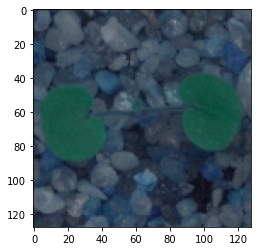

In [30]:
# Check Images
i = 0
img = trainImg[i]
#label = trainLabel[0][i]
label = trainLabel.iloc[[i],:]
print(f'Image name:{label}')
plt.imshow(img)

Image name:                 Label
1500  Common Chickweed


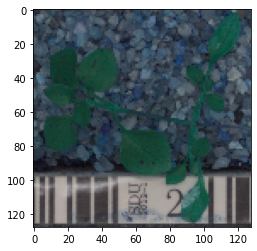

In [31]:
# Check Images
i = 1500
img = trainImg[i]
#label = trainLabel[0][i]
label = trainLabel.iloc[[i],:]
print(f'Image name:{label}')
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


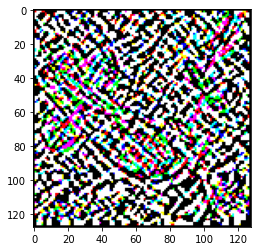

In [34]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

## Pre-processing

**Data normalization to 0-1 by diving the values by 255**


In [38]:
trainImg = trainImg.astype('float32')
trainImg /= 255
#Check the nomalized data
print(f'Shape of the training array:{trainImg.shape}')
print(f'Minimum value in the training array:{trainImg.min()}')
print(f'Maximum value in the training array:{trainImg.max()}')

Shape of the training array:(4750, 128, 128, 3)
Minimum value in the training array:0.0
Maximum value in the training array:1.0


## Split the dataset

**Split the dataset into training, testing, and validation set. First split train images and train labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5**

In [60]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(trainImg, trainLabel, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [61]:
#Split validation from test set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

## One hot encode target values

In [64]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)
print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (3325, 12)
One value of y_train: [0 0 1 0 0 0 0 0 0 0 0 0]


## Gaussian Blurring

**Image blurring  by convolving the image with a low-pass filter kernel to remove noise.**

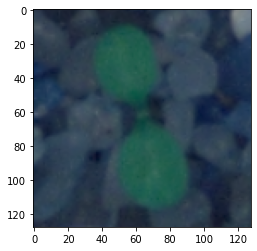

In [65]:
# Preview the image before Gaussian Blur
plt.imshow(X_train[1], cmap='gray')

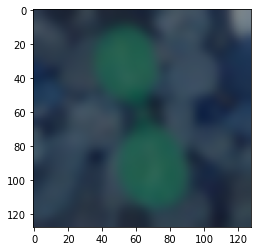

In [66]:
plt.imshow(cv2.GaussianBlur(X_train[1], (15,15), 0))

In [67]:
# Apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X_train):
  X_train[idx] = cv2.GaussianBlur(img, (5, 5), 0)

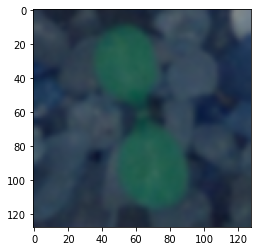

In [68]:
# Preview the image after Gaussian Blur
plt.imshow(X_train[1], cmap='gray')

In [69]:
# Apply Gaussian Blur to the Test and Validation sets
for idx, img in enumerate(X_test):
  X_test[idx] = cv2.GaussianBlur(img, (5, 5), 0)

for idx, img in enumerate(X_validation):
  X_validation[idx] = cv2.GaussianBlur(img, (5, 5), 0)

### Initialize a sequential model 
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (128, 128, 3) for first layer
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [76]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

### Compile and fit the model
- compile the model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- fit the model
    - give train data - training features and labels
    - batch size: 100
    - epochs: 10
    - give validation data - testing features and labels

In [77]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=100, epochs=30, validation_data=(X_validation, y_validation))

#model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=10, batch_size=32)

Epoch 1/30
34/34 [==============================] - 39s 1s/step - loss: 2.8224 - accuracy: 0.2743 - val_loss: 1.4897 - val_accuracy: 0.5147
Epoch 2/30
34/34 [==============================] - 39s 1s/step - loss: 1.3460 - accuracy: 0.5603 - val_loss: 1.2823 - val_accuracy: 0.5905
Epoch 3/30
34/34 [==============================] - 39s 1s/step - loss: 1.0047 - accuracy: 0.6614 - val_loss: 1.1808 - val_accuracy: 0.6003
Epoch 4/30
34/34 [==============================] - 39s 1s/step - loss: 0.8572 - accuracy: 0.7101 - val_loss: 1.0610 - val_accuracy: 0.6480
Epoch 5/30
34/34 [==============================] - 40s 1s/step - loss: 0.6868 - accuracy: 0.7762 - val_loss: 1.0149 - val_accuracy: 0.6704
Epoch 6/30
34/34 [==============================] - 39s 1s/step - loss: 0.5426 - accuracy: 0.8253 - val_loss: 1.1416 - val_accuracy: 0.6480
Epoch 7/30
34/34 [==============================] - 39s 1s/step - loss: 0.5131 - accuracy: 0.8340 - val_loss: 1.1468 - val_accuracy: 0.6325
Epoch 8/30
34/34 [==

### Final loss and accuracy

In [78]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 2s 83ms/step - loss: 1.8330 - accuracy: 0.6685


[1.8330042362213135, 0.6685393452644348]

## CNN Model with Pooling and Dropout
### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (128, 128, 3) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - the final Dense layer must have neurons equal to the number of output classes

In [79]:
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 12 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

### Compile and fit the model
- compile the model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "adam"
- use EarlyStopping
- fit the model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 20 
    - give validation data - testing features and labels

In [81]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/20
104/104 [==============================] - 42s 406ms/step - loss: 2.6382 - accuracy: 0.1540 - val_loss: 2.2051 - val_accuracy: 0.2444
Epoch 2/20
104/104 [==============================] - 53s 505ms/step - loss: 1.9852 - accuracy: 0.3549 - val_loss: 1.8938 - val_accuracy: 0.3876
Epoch 3/20
104/104 [==============================] - 44s 421ms/step - loss: 1.7109 - accuracy: 0.4565 - val_loss: 1.7434 - val_accuracy: 0.4494
Epoch 4/20
104/104 [==============================] - 43s 411ms/step - loss: 1.4857 - accuracy: 0.5209 - val_loss: 1.7682 - val_accuracy: 0.4480
Epoch 5/20
104/104 [==============================] - 42s 403ms/step - loss: 1.3188 - accuracy: 0.5847 - val_loss: 1.5613 - val_accuracy: 0.4986
Epoch 6/20
104/104 [==============================] - 42s 408ms/step - loss: 1.1502 - accuracy: 0.6189 - val_loss: 1.6152 - val_accuracy: 0.4944
Epoch 7/20
104/104 [==============================] - 41s 394ms/step - loss: 1.0208 - accuracy: 0.6568 - val_loss: 1.5920 - val_ac

### Model retrain

### Initialize a sequential model again
- define a sequential model
- add 4 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (128, 128, 3) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.25
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - the final Dense layer must have neurons equal to the number of output classes

In [83]:
model = Sequential()

# Add convolution layer with 32 filters and 3 kernels
model.add(Conv2D(32, (3,3), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Add convolution layer with 32 filters and 3 kernels
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Add convolution layer with 32 filters and 3 kernels
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

# Flatten the 2D array to 1D array
model.add(Flatten())

# Create fully connected layers with 512 units
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# The final output layer with 12 neurons to predict the categorical classifcation
model.add(Dense(12, activation="softmax"))
  

### Compile and fit the mode

In [89]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
#callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.0001)

# Add constraints and record best weights to resume 
callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 10 epochs
        verbose=1), 
    
    ModelCheckpoint('./model3/best_weights_model3.h5',
       monitor='val_loss',
       verbose=1,
       save_best_only=True,
       save_weights_only=True,
       mode='auto')
]
    
# Fit the model
model.fit(x=X_train, y=y_train, batch_size=100, epochs=30, validation_data=(X_validation, y_validation), callbacks=[callback])

Epoch 1/30
34/34 [==============================] - 34s 1s/step - loss: 0.6408 - accuracy: 0.7750 - val_loss: 0.7420 - val_accuracy: 0.7461
Epoch 2/30
34/34 [==============================] - 35s 1s/step - loss: 0.5654 - accuracy: 0.8009 - val_loss: 0.6837 - val_accuracy: 0.7658
Epoch 3/30
34/34 [==============================] - 35s 1s/step - loss: 0.4802 - accuracy: 0.8268 - val_loss: 0.8627 - val_accuracy: 0.7377
Epoch 4/30
34/34 [==============================] - 34s 1s/step - loss: 0.4624 - accuracy: 0.8385 - val_loss: 0.7488 - val_accuracy: 0.7560


In [91]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)       

### Final loss and accuracy

In [90]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 2s 87ms/step - loss: 0.7103 - accuracy: 0.7767


[0.7103344798088074, 0.7766854166984558]

### Confusion Matrix

In [93]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [94]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

=== Confusion Matrix ===
[[25  0  0  0  5  0 10  0  0  0  0  1]
 [ 2 49  3  0  0  0  0  0  0  0  1  0]
 [ 3  3 42  1  0  0  0  0  0  0  0  0]
 [ 1  0  0 79  0  0  0  2  1  4  1  0]
 [17  0  0  0 13  0  0  0  2  0  0  1]
 [ 3  3  5  1  1 60  0  0  0  1  0  0]
 [29  0  1  0  6  0 63  0  0  0  1  1]
 [ 3  0  1  0  0  0  0 23  2  0  1  0]
 [ 9  3  2  0  1  0  0  1 56  1  0  1]
 [10  2  0  0  0  1  0  2  9 23  1  0]
 [ 6  2  1  0  0  0  0  2  1  0 59  1]
 [ 2  1  1  0  0  0  0  1  2  0  1 39]]


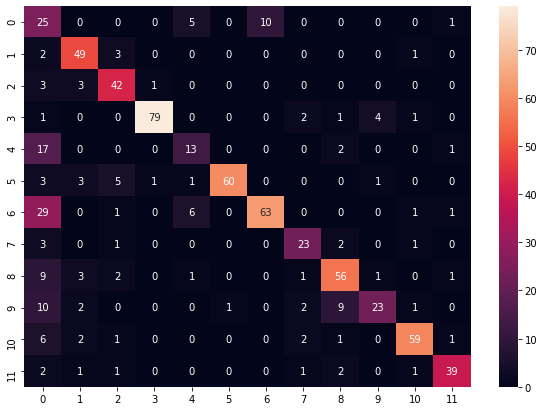

In [100]:
#Build confusion matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')





In [101]:
print("=== Classification Report ===")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.23      0.61      0.33        41
           1       0.78      0.89      0.83        55
           2       0.75      0.86      0.80        49
           3       0.98      0.90      0.93        88
           4       0.50      0.39      0.44        33
           5       0.98      0.81      0.89        74
           6       0.86      0.62      0.72       101
           7       0.74      0.77      0.75        30
           8       0.77      0.76      0.76        74
           9       0.79      0.48      0.60        48
          10       0.91      0.82      0.86        72
          11       0.89      0.83      0.86        47

    accuracy                           0.75       712
   macro avg       0.76      0.73      0.73       712
weighted avg       0.81      0.75      0.76       712



### Visualize Predictions

Predicted label: Black-grass


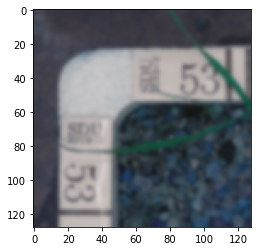

In [102]:
#Visualize predictions for x_test[2]
y_pred = encoder.inverse_transform(y_pred)

index = 2
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Common Chickweed


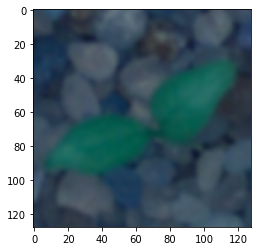

In [105]:
#Visualize predictions for x_test[3]
index = 3
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


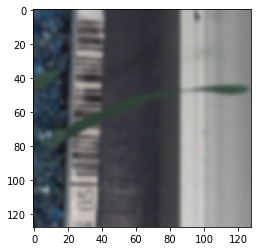

In [106]:
#Visualize predictions for x_test[33]
index = 33
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Black-grass


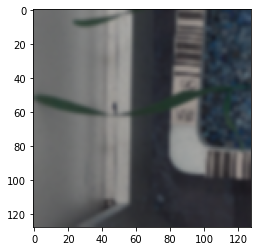

In [107]:
#Visualize predictions for x_test[36]
index = 36
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])

Predicted label: Small-flowered Cranesbill


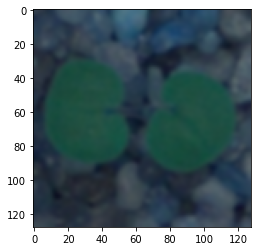

In [108]:
#Visualize predictions for x_test[59]
index = 59
plt.imshow(X_test[index], cmap='gray')
print("Predicted label:", y_pred[index])